# Programming Problem: Model Comparison among Logistic Regression, Linear SVM and Gaussian Kernel SVM 

In this problem, you are expected to implement and compare three models: (1) logistic regression, (2) a linear SVM, (3) a Gaussian kernel SVM. In this assignment, you are allowed to use the sklearn packages.

**Data**: we provide binary classification dataset camel_train.cvs and camel_test.cvs for training and testing respectively (these files are both in hw3_data_files.zip). The model is trained on training set, you are supposed to report accuracy both on the training set and on the test set. Each sample consists of input features $x^{(i)} \in \mathbb{R}^2$ and class lables $y^{(i)} \in \{-1, 1\}$. Note that here the labels are $\{-1,+1\}$ valued rather than $\{0,1\}$ valued for convenience.

**Part (a) [5 points]** Visualize the training data in 2D space in Sec 1.1 and estimate or guess based on visualization which classifier you think will be most suitable for the dataset, and explain why. Write down this estimation {\bf before} you start your implementation and testing, and this is what you'll also turn in. Note that you will not be penalized for getting the wrong answer here, the main thing we would like to see is your prediction and your clear justification why. 

**Part (b) [10 points]** Implement a function in Sec 1.2 that can learn the Logistic Regression, Linear SVM, Gaussian kernel SVM models by setting the appropriate model type.

**Part (c) [5 points]** Report the accuracy of each model and explain why one method is superior to the others (that is, fill in Sec 1.3).

**Part (d) [5 points]** Discuss how the decision boundary of each model looks like in 2D space and why. Please be very clear and precise in your discussion. 

**Part (d) [10 points]** Fill in the code to visualize the decision boundary of the learned model in Sec 1.4. Do they follow your assumptions and guesses above? If so, explain why the experiment confirmed your hypothesis. If the models did not behave consistently with your expectations explain why, and most importantly, explain how your hypotheses were adjusted and critically what you learned from this experiment.






In [2]:
# Import Modules
import sklearn
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


In [3]:
# Load dataset
# Read in the csv
df_train=pd.read_csv('camel_train.csv', encoding='utf-8')
df_test = pd.read_csv('camel_test.csv', encoding='utf-8')
# Difference between white rating and black rating - independent variable
df_train.head()

,0.566992416097,0.84059391133,-1.0
0,0.297289,0.791696,-1.0
1,1.030462,0.429955,1.0
2,0.311769,0.867175,-1.0
3,0.883618,0.397090,1.0
4,0.362195,0.880017,1.0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   0.566992416097  99 non-null     float64
 1   0.84059391133   99 non-null     float64
 2   -1.0            99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


In [5]:
df_train.describe()

,0.566992416097,0.84059391133,-1.0
count,99.000000,99.000000,99.000000
mean,0.482068,0.694767,0.212121
std,0.277511,0.168909,0.982217
min,0.019830,0.363592,-1.000000
25%,0.230922,0.570406,-1.000000
50%,0.467246,0.691494,1.000000
75%,0.682227,0.848954,1.000000
max,1.041663,0.979701,1.000000


In [6]:
# Select rating difference and turns as feature to predict the label
# training set
x_train = df_train.iloc[:, [0,1]].to_numpy()
y_train = df_train.iloc[:, 2].to_numpy()

# testing set
x_test = df_test.iloc[:, [0,1]].to_numpy()
y_test = df_test.iloc[:, 2].to_numpy()

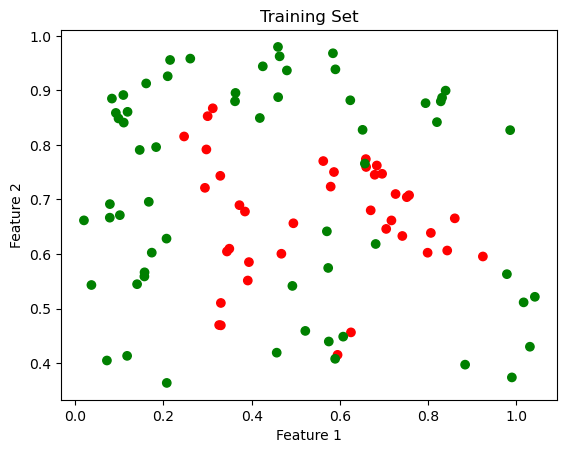

In [7]:
#@title Part (a)
# visualize training set
# TODO
# Visualize training set
plt.scatter(x_train[:, 0], x_train[:, 1], c=['r' if y == -1 else 'g' for y in y_train])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Set')
plt.show()

In [8]:
#@title Part (b) implement
# Train logistic regression and print accuracy
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import svm
# define training procedure for logistic regression and svm
#def training(x_train, y_train, x_test, y_test, model_type = 'logistic', kernel=None):
  # specify the model used to learn by model_type
  # model_type == 'logistic' -> using logistic regression model
  # model_type == 'svm' --> using SVM model
  # kernel == None  --> using linear kenel for SVM
  # kernel == 'rbf' --> using gaussian kernel for SVM
  # define models
  
  # TODO
 # return model, acc_train, acc_test



from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score

def training(x_train, y_train, x_test, y_test, model_type = 'logistic', kernel=None):
    # Define models
    if model_type == 'logistic':
        model = LogisticRegression()
    elif model_type == 'svm':
        if kernel is None:
            model = svm.LinearSVC()
        elif kernel == 'rbf':
            model = svm.SVC(kernel='rbf')
        else:
            raise ValueError('Unsupported kernel type')

    # Train the model
    model.fit(x_train, y_train)

    # Evaluate the model on training set
    y_train_pred = model.predict(x_train)
    acc_train = accuracy_score(y_train, y_train_pred)

    # Evaluate the model on testing set
    y_test_pred = model.predict(x_test)
    acc_test = accuracy_score(y_test, y_test_pred)

    # Return the model and its accuracy
    return model, acc_train, acc_test



In [9]:
#@title Part (c)
# train logistic regression
# TODO

# train linear SVM
# TODO


# train Gaussian SVM
# TODO

# Report accuracies of the above three
# TODO



#@title Part (c)
from sklearn.metrics import accuracy_score

# train logistic regression
model_lr, acc_train_lr, acc_test_lr = training(x_train, y_train, x_test, y_test, model_type='logistic')
y_pred_train_lr = model_lr.predict(x_train)
y_pred_test_lr = model_lr.predict(x_test)
print(f"Logistic Regression Accuracy: Training={acc_train_lr:.4f}, Test={acc_test_lr:.4f}")

# train linear SVM
model_svm_l, acc_train_svm_l, acc_test_svm_l = training(x_train, y_train, x_test, y_test, model_type='svm', kernel= None)
y_pred_train_svm_l = model_svm_l.predict(x_train)
y_pred_test_svm_l = model_svm_l.predict(x_test)
print(f"Linear SVM Accuracy: Training={acc_train_svm_l:.4f}, Test={acc_test_svm_l:.4f}")

# train Gaussian SVM
model_svm_g, acc_train_svm_g, acc_test_svm_g = training(x_train, y_train, x_test, y_test, model_type='svm', kernel='rbf')
y_pred_train_svm_g = model_svm_g.predict(x_train)
y_pred_test_svm_g = model_svm_g.predict(x_test)
print(f"Gaussian SVM Accuracy: Training={acc_train_svm_g:.4f}, Test={acc_test_svm_g:.4f}")

# Compare the performance of each model
# TODO



Logistic Regression Accuracy: Training=0.5556, Test=0.5313
Linear SVM Accuracy: Training=0.5859, Test=0.5815
Gaussian SVM Accuracy: Training=0.8586, Test=0.7193


In [18]:
# Part (d) plot decision boundary for learned models, add discussion in your writeup.

# Visualize decision boundary for logistic regression
# TODO

# Visualize decision boundary for linear SVM
# TODO

# Visualize decision boundary for Gaussian SVM
# TODO

# Plot decision boundary
def plot_decision_boundary(model, x_train, y_train, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = x_train[:, 0].min() - 0.5, x_train[:, 0].max() + 0.5
    y_min, y_max = x_train[:, 1].min() - 0.5, x_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=['r' if y == -1 else 'g' for y in y_train], cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()





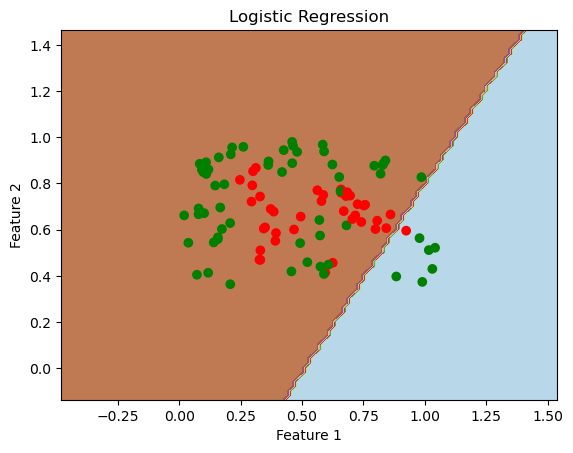

In [19]:
# Part (e)
# plot decision boundary for logistic regression
# TODO
# Part (e)
# plot decision boundary for logistic regression
# visualize decision boundary for SVM
plot_decision_boundary(model_lr, x_train, y_train, 'Logistic Regression')


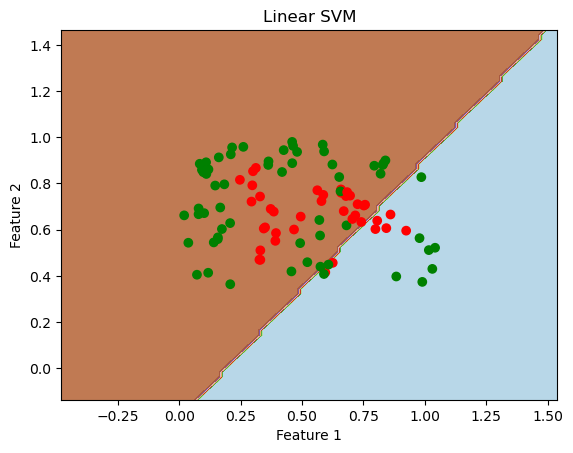

In [20]:
# plot decision boundary for linear svm
# TODO

plot_decision_boundary(model_svm_l, x_train, y_train, 'Linear SVM')

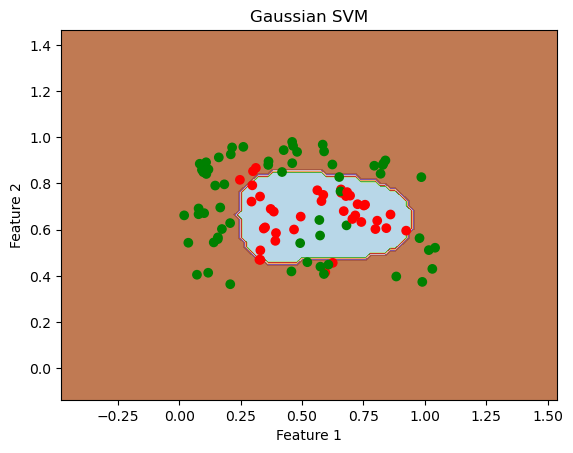

In [21]:
# plot decision boundary for linear svm
# TODO
plot_decision_boundary(model_svm_g, x_train, y_train, 'Gaussian SVM')